In [1]:
# importing some necessary packages
import pandas as pd
import numpy as np
import os
import us
import glob
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Obtaining datasets
us_list = sorted(glob.glob('../data/*.zip'))
us_list

['../data/US_counties_COVID19_health_weather_data.csv.zip',
 '../data/us_counties_covid19_daily.csv.zip',
 '../data/us_county_geometry.csv.zip',
 '../data/us_county_sociohealth_data.csv.zip',
 '../data/us_states_covid19_daily.csv.zip']

Converting each dataset as dataframe

In [3]:
us_countiesDaily = pd.read_csv(us_list[1])
us_countiesDailyPlus = pd.read_csv(us_list[0])
us_countySocio = pd.read_csv(us_list[3])
us_statesDaily = pd.read_csv(us_list[4]) 
us_daily = pd.read_csv('../data/us_covid19_daily.csv')

Inspect each dataset

In [4]:
us_countiesDaily.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [5]:
us_countiesDailyPlus.columns.values

array(['date', 'county', 'state', 'fips', 'cases', 'deaths',
       'stay_at_home_announced', 'stay_at_home_effective', 'lat', 'lon',
       'total_population', 'area_sqmi', 'population_density_per_sqmi',
       'num_deaths', 'years_of_potential_life_lost_rate',
       'percent_fair_or_poor_health',
       'average_number_of_physically_unhealthy_days',
       'average_number_of_mentally_unhealthy_days',
       'percent_low_birthweight', 'percent_smokers',
       'percent_adults_with_obesity', 'food_environment_index',
       'percent_physically_inactive',
       'percent_with_access_to_exercise_opportunities',
       'percent_excessive_drinking',
       'num_alcohol_impaired_driving_deaths', 'num_driving_deaths',
       'percent_driving_deaths_with_alcohol_involvement',
       'num_chlamydia_cases', 'chlamydia_rate', 'teen_birth_rate',
       'num_uninsured', 'percent_uninsured',
       'num_primary_care_physicians', 'primary_care_physicians_rate',
       'num_dentists', 'dentist_rate'

In [6]:
us_countySocio.head()

,fips,state,county,lat,lon,total_population,area_sqmi,population_density_per_sqmi,num_deaths,years_of_potential_life_lost_rate,...,percentile_rank_minorities,percentile_rank_limited_english_abilities,percentile_rank_minority_status_and_language_theme,percentile_rank_multi_unit_housing,percentile_rank_mobile_homes,percentile_rank_overcrowding,percentile_rank_no_vehicle,percentile_rank_institutionalized_in_group_quarters,percentile_rank_housing_and_transportation,percentile_rank_social_vulnerability
0,01001,Alabama,Autauga,32.534928,-86.642748,55049,594.446120,92.605533,791.0,8128.591190,...,0.6339,0.5355,0.5976,0.6791,0.7268,0.2477,0.3298,0.1251,0.2881,0.3773
1,01003,Alabama,Baldwin,30.727489,-87.722575,199510,1589.807425,125.493187,2967.0,7354.122530,...,0.5253,0.5282,0.5294,0.9733,0.5387,0.2639,0.0872,0.3438,0.3324,0.2757
2,01005,Alabama,Barbour,31.869589,-85.393213,26614,884.875776,30.076538,472.0,10253.573403,...,0.9042,0.6979,0.8558,0.2814,0.9370,0.4438,0.8816,0.9427,0.9312,0.9847
3,01007,Alabama,Bibb,32.998634,-87.126480,22572,622.582355,36.255444,471.0,11977.539484,...,0.6450,0.3553,0.5018,0.4072,0.9249,0.0248,0.5645,0.9156,0.6663,0.5737
4,01009,Alabama,Blount,33.980878,-86.567383,57704,644.806508,89.490412,1085.0,11335.071134,...,0.4238,0.7482,0.5992,0.1344,0.8465,0.5056,0.1907,0.1515,0.1827,0.4986


## Action Items (data cleaning)
1. Number states to state names.
2. Or abbreviations for uniformity accross all datasets.
3. Uniform dates in all 3 dataframes to inspect daily cases.
4. Look at county GDP data, health insurance, etc. 

### Fix Dates

In [7]:
# us_statesDaily fix
datesCol_dailyStates = us_statesDaily['date']
datesFormatted_statesDaily = [datetime.strptime(str(date), '%Y%m%d').strftime('%Y-%m-%d') for date in datesCol_dailyStates]
us_statesDaily = us_statesDaily.drop(['date'], axis=1)
us_statesDaily['date'] = datesFormatted_statesDaily

# us_daily fix
datesCol_usdaily = us_daily['date']
datesFormatted_usDaily = [datetime.strptime(str(date), '%Y%m%d').strftime('%Y-%m-%d') for date in datesCol_usdaily]
us_daily = us_daily.drop(['date'], axis=1)
us_daily['date'] = datesFormatted_usDaily

**Dates fixed!**

### Fix States

In [8]:
singleNumber = us_daily['states']
numberFixed = ["{0:0=2d}".format(i) for i in singleNumber]
us_daily = us_daily.drop(['states'], axis=1)
us_daily['states'] = numberFixed

In [9]:
np.unique(us_daily['states'])

array(['02', '03', '04', '05', '07', '10', '11', '13', '24', '30', '39',
       '51', '56'], dtype=object)

In [10]:
fipStates = us.states.mapping('fips', 'abbr')
us_daily = us_daily.replace({"states": fipStates})


Now fix the fullnames of states to two letter abbreviations, using the abbreviation dictionary.

In [11]:
# state abbreviations
states_short = us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'}

The states that need this change are:
- us_countiesDaily
- us_countiesDailyPlus
- us_countySocio

In [12]:
us_countiesDaily = us_countiesDaily.replace({"state": states_short})
us_countiesDailyPlus = us_countiesDailyPlus.replace({'state': states_short})
us_countySocio = us_countySocio.replace({"state": states_short})

**States fixed!**

## Best Features to look for

In [13]:
us_statesDaily.head()

,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,...,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade,date
0,AK,35720.0,NaN,1042056.0,NaN,totalTestsViral,1077776.0,164.0,799.0,NaN,...,0,0,7b1d31e2756687bb9259b29195f1db6cdb321ea6,0,0,0,0,0,NaN,2020-12-06
1,AL,269877.0,45962.0,1421126.0,NaN,totalTestsPeopleViral,1645041.0,1927.0,26331.0,NaN,...,12,0,19454ed8fe28fc0a7948fc0771b2f3c846c1c92e,0,0,0,0,0,NaN,2020-12-06
2,AR,170924.0,22753.0,1614979.0,NaN,totalTestsViral,1763150.0,1076.0,9401.0,374.0,...,40,21,25fc83bffff5b32ba1a737be8e087fad9f4fde33,0,0,0,0,0,NaN,2020-12-06
3,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,NaN,...,0,0,8c39eec317586b0c34fc2903e6a3891ecb00469e,0,0,0,0,0,NaN,2020-12-06
4,AZ,364276.0,12590.0,2018813.0,NaN,totalTestsPeopleViral,2370499.0,2977.0,28248.0,714.0,...,25,242,7cf59da9e4bc31d905e179211313d08879880a85,0,0,0,0,0,NaN,2020-12-06


In [14]:
us_countiesDailyPlus.head()

,date,county,state,fips,cases,deaths,stay_at_home_announced,stay_at_home_effective,lat,lon,...,min_temp_3d_avg,min_temp_5d_avg,min_temp_10d_avg,min_temp_15d_avg,dewpoint_3d_avg,dewpoint_5d_avg,dewpoint_10d_avg,dewpoint_15d_avg,date_stay_at_home_announced,date_stay_at_home_effective
0,2020-01-21,Snohomish,WA,53061,1,0.0,no,no,48.047489,-121.697307,...,38.266667,38.92,38.44,36.146667,40.333333,41.64,40.74,37.973333,2020-03-23,2020-03-23
1,2020-01-22,Snohomish,WA,53061,1,0.0,no,no,48.047489,-121.697307,...,39.233333,41.12,39.76,37.613333,42.633333,42.98,41.68,39.440000,2020-03-23,2020-03-23
2,2020-01-23,Snohomish,WA,53061,1,0.0,no,no,48.047489,-121.697307,...,42.900000,41.74,41.15,38.226667,44.733333,43.72,42.47,40.120000,2020-03-23,2020-03-23
3,2020-01-24,Cook,IL,17031,1,0.0,no,no,41.840039,-87.816716,...,32.366667,30.02,27.43,24.886667,31.433333,28.50,25.00,22.693333,2020-03-20,2020-03-21
4,2020-01-24,Snohomish,WA,53061,1,0.0,no,no,48.047489,-121.697307,...,44.600000,42.54,41.75,38.226667,46.000000,44.30,42.88,41.293333,2020-03-23,2020-03-23


In [15]:
us_countySocio.head()

,fips,state,county,lat,lon,total_population,area_sqmi,population_density_per_sqmi,num_deaths,years_of_potential_life_lost_rate,...,percentile_rank_minorities,percentile_rank_limited_english_abilities,percentile_rank_minority_status_and_language_theme,percentile_rank_multi_unit_housing,percentile_rank_mobile_homes,percentile_rank_overcrowding,percentile_rank_no_vehicle,percentile_rank_institutionalized_in_group_quarters,percentile_rank_housing_and_transportation,percentile_rank_social_vulnerability
0,01001,AL,Autauga,32.534928,-86.642748,55049,594.446120,92.605533,791.0,8128.591190,...,0.6339,0.5355,0.5976,0.6791,0.7268,0.2477,0.3298,0.1251,0.2881,0.3773
1,01003,AL,Baldwin,30.727489,-87.722575,199510,1589.807425,125.493187,2967.0,7354.122530,...,0.5253,0.5282,0.5294,0.9733,0.5387,0.2639,0.0872,0.3438,0.3324,0.2757
2,01005,AL,Barbour,31.869589,-85.393213,26614,884.875776,30.076538,472.0,10253.573403,...,0.9042,0.6979,0.8558,0.2814,0.9370,0.4438,0.8816,0.9427,0.9312,0.9847
3,01007,AL,Bibb,32.998634,-87.126480,22572,622.582355,36.255444,471.0,11977.539484,...,0.6450,0.3553,0.5018,0.4072,0.9249,0.0248,0.5645,0.9156,0.6663,0.5737
4,01009,AL,Blount,33.980878,-86.567383,57704,644.806508,89.490412,1085.0,11335.071134,...,0.4238,0.7482,0.5992,0.1344,0.8465,0.5056,0.1907,0.1515,0.1827,0.4986


# Inspirational Questions
1. What is the start and end dates of this dataset?
2. Plotting outbreaks county by county
3. Do stay at home orders slow the spread of COVID19
4. What is the medium/income for the county with the greatest increase?
5. Number of cases in relation to risk factors and confounding factors based on weather.

In [16]:
date_min = us_countiesDailyPlus['date'].min()
date_max = us_countiesDailyPlus['date'].max()

print('This dataset records data from ', date_min, " to ", date_max)

This dataset records data from  2020-01-21  to  2020-12-04


**This means that we can extract information from the very start of last year (when the pandemic started), to December 4th of last year.**

# Let's analyze a Specific State

In [17]:
stateofChoice = 'CA'
countyofChoice = 'Alameda'

In [18]:
# let's focus on California
CA_counties = us_countiesDailyPlus[us_countiesDailyPlus['state'] == 'CA']

## Which state counties are recorded in this dataset?

In [19]:
which_counties = np.unique(CA_counties['county'])
print('Counties: ')
print('____________')
for c in which_counties:
    print(c)

Counties: 
____________
Alameda
Alpine
Amador
Butte
Calaveras
Colusa
Contra Costa
Del Norte
El Dorado
Fresno
Glenn
Humboldt
Imperial
Inyo
Kern
Kings
Lake
Lassen
Los Angeles
Madera
Marin
Mariposa
Mendocino
Merced
Modoc
Mono
Monterey
Napa
Nevada
Orange
Placer
Plumas
Riverside
Sacramento
San Benito
San Bernardino
San Diego
San Francisco
San Joaquin
San Luis Obispo
San Mateo
Santa Barbara
Santa Clara
Santa Cruz
Shasta
Sierra
Siskiyou
Solano
Sonoma
Stanislaus
Sutter
Tehama
Trinity
Tulare
Tuolumne
Ventura
Yolo
Yuba


## How many cases of COVID-19 were there (recorded until 12/04/2020)? 

In [20]:
print('Total number of cases is ', CA_counties['cases'].max())

Total number of cases is  430713


### As of 12/04/2020, there was over 400k cases in CA. 
Just to see how much the cases have grown, let's set a boundary in the number of cases between 25 to 100k.

In [21]:
casesCA = CA_counties[['date', 'county', 'cases']]
casesCA = casesCA[(casesCA['cases'] >= 25) & (casesCA['cases'] <= 100000)]

In [22]:
byCounty = casesCA.groupby('county')
# get Alameda County
thisCounty = byCounty.get_group("Alameda")
thisCounty['Days since 25th Case'] = np.arange(len(thisCounty))
thisCounty = thisCounty.sample(150)

/Users/mirasilvia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


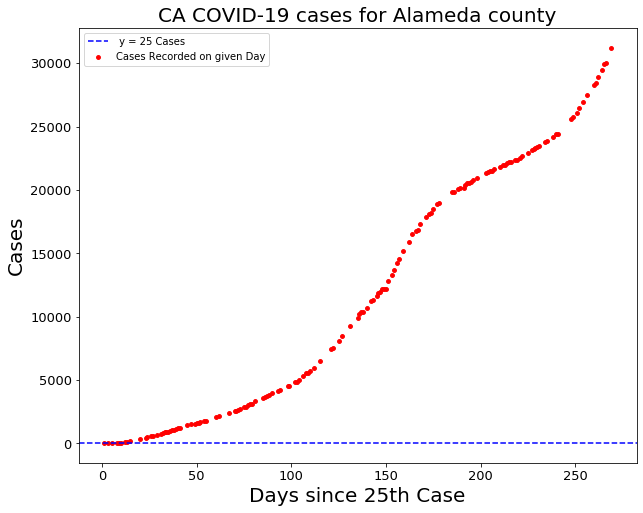

In [26]:
fig, ax = plt.subplots(figsize = (10,8))
thisCounty.plot(x='Days since 25th Case', y = 'cases',
                kind='scatter', legend='county', ax=ax,
                s=15.0, color='red')
plt.xticks(size=13)
plt.yticks(size=13)
plt.xlabel(xlabel= 'Days since 25th Case', fontsize=20)
plt.ylabel(ylabel= 'Cases', fontsize=20)
title =  stateofChoice +  ' COVID-19 cases for ' +  countyofChoice + ' county'
plt.title(title, fontsize=20)
plt.axhline(y=25, color='blue', linestyle='--')
plt.legend([' y = 25 Cases', 'Cases Recorded on given Day'],
          prop={'size': 10})

### Export this Data!

In [45]:
thisCounty.to_csv('CA_AlamedaCovid.csv')

- Days after 25 cases
    - How much does that reduce the data?
- Include income based information
- Include healthcare coverage information (how much is this really going to tell us?)
- Make it interactive